In [1]:

pip install easyocr

In [2]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:

import cv2

In [7]:

import matplotlib.pyplot as plt

In [8]:

import numpy as np

In [9]:
import easyocr


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\sys\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\sys\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\sys\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelapp.py", line 7

In [10]:

import imutils

In [11]:

img = cv2.imread('test.jpg')
print(img)

[[[ 77  47  28]
  [ 74  44  25]
  [ 75  45  26]
  ...
  [217 193 171]
  [203 171 142]
  [186 144 109]]

 [[ 72  45  24]
  [ 74  45  24]
  [ 73  44  23]
  ...
  [195 161 132]
  [165 126  94]
  [103  69  39]]

 [[ 70  44  20]
  [ 71  44  23]
  [ 74  44  25]
  ...
  [129  89  60]
  [ 80  53  26]
  [ 71  44  17]]

 ...

 [[ 35  21  15]
  [ 36  23  15]
  [ 39  26  18]
  ...
  [ 30  18  12]
  [ 30  18  12]
  [ 26  17  13]]

 [[ 18  13  12]
  [ 17  12  11]
  [ 18  13  12]
  ...
  [ 23  21  21]
  [ 21  16  17]
  [ 20  18  18]]

 [[ 26  24  23]
  [ 25  23  22]
  [ 24  22  21]
  ...
  [ 37  35  34]
  [ 42  39  35]
  [ 41  36  33]]]


In [12]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     

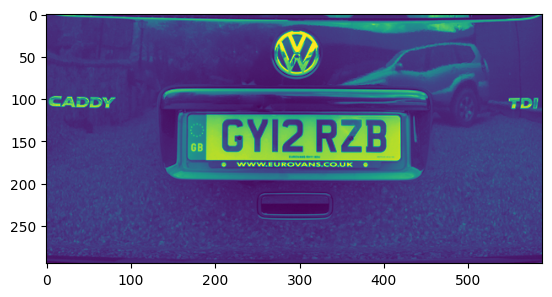

In [13]:

plt.imshow(gray)

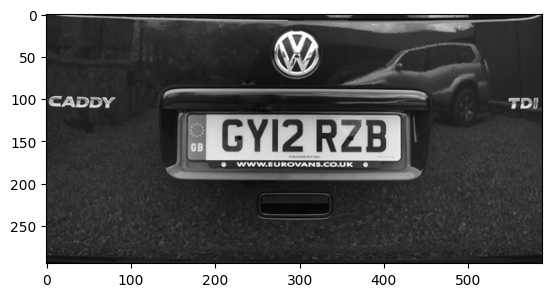

In [14]:

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [15]:

bfilter = cv2.bilateralFilter(gray, 11, 11, 17)

In [16]:

edged = cv2.Canny(bfilter, 30, 200)

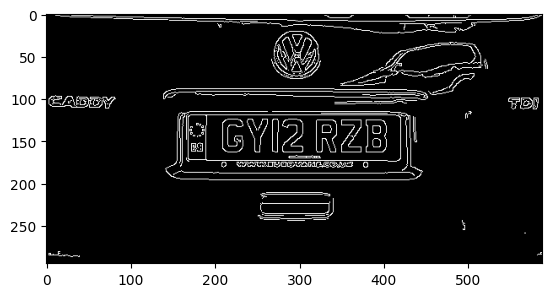

In [17]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [18]:
#  cv.CHAIN_APPROX_NONE gives (734 points) and  with cv.CHAIN_APPROX_SIMPLE (only 4 points)

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
     

In [19]:

# Simplifies how contonours are actually returned
contours = imutils.grab_contours(keypoints)

In [20]:

contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [21]:

print(contours)
     

[array([[[171, 119]],

       [[170, 120]],

       [[169, 120]],

       [[168, 121]],

       [[168, 171]],

       [[169, 172]],

       [[168, 173]],

       [[167, 173]],

       [[166, 172]],

       [[166, 170]],

       [[166, 172]],

       [[168, 174]],

       [[169, 174]],

       [[168, 173]],

       [[169, 172]],

       [[189, 172]],

       [[190, 173]],

       [[404, 173]],

       [[405, 174]],

       [[415, 174]],

       [[416, 173]],

       [[418, 173]],

       [[420, 171]],

       [[420, 122]],

       [[418, 120]],

       [[415, 120]],

       [[414, 119]]], dtype=int32), array([[[190, 120]],

       [[191, 119]],

       [[414, 119]],

       [[415, 120]],

       [[417, 120]],

       [[420, 123]],

       [[420, 170]],

       [[417, 173]],

       [[416, 173]],

       [[415, 174]],

       [[405, 174]],

       [[404, 173]],

       [[191, 173]],

       [[189, 171]],

       [[189, 132]],

       [[190, 131]]], dtype=int32), array([[[154,  88]],

   

In [22]:
location = None

for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [23]:

print(location)

[[[168 121]]

 [[168 174]]

 [[420 171]]

 [[414 119]]]


In [24]:

mask = np.zeros(gray.shape, np.uint8)

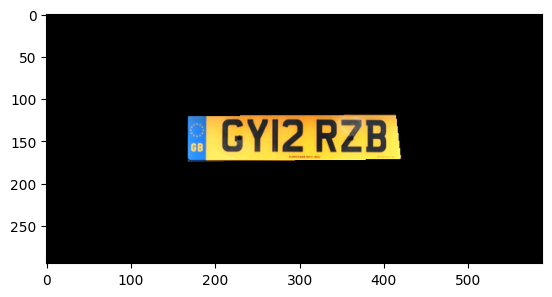

In [25]:

new_image = cv2.drawContours(mask, [location], 0, 255, -1)

new_image = cv2.bitwise_and(img, img, mask = mask)


plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
     

In [26]:
(x, y) = np.where(mask == 255)

(x1, y1) = (np.min(x), np.min(y))

(x2, y2) = (np.max(x), np.max(y))

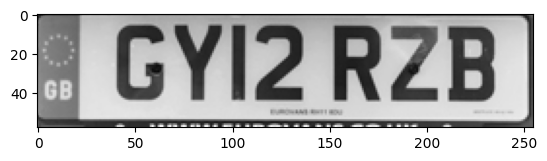

In [27]:
cropped_image = gray[x1:x2+3, y1:y2+3]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [28]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install easyocr

In [31]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install numpy<2

Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [32]:
import numpy
reader = easyocr.Reader(['en'])

result = reader.readtext(cropped_image)

print(result)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


RuntimeError: Numpy is not available

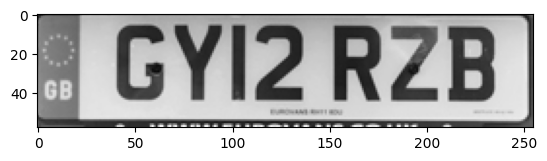

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


RuntimeError: Numpy is not available

In [33]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt

# Assuming gray, x1, x2, y1, y2 are defined earlier in your code
cropped_image = gray[x1:x2+3, y1:y2+3]

# Display the cropped image (optional)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

# Perform OCR on the cropped image
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

# Print the OCR result
print(result)


In [34]:

print(result[0][0])
     

NameError: name 'result' is not defined

In [35]:

print(result[0][1])

NameError: name 'result' is not defined

In [36]:

text = result[0][1]

font = cv2.FONT_HERSHEY_SIMPLEX

NameError: name 'result' is not defined

In [37]:
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)
     

NameError: name 'text' is not defined

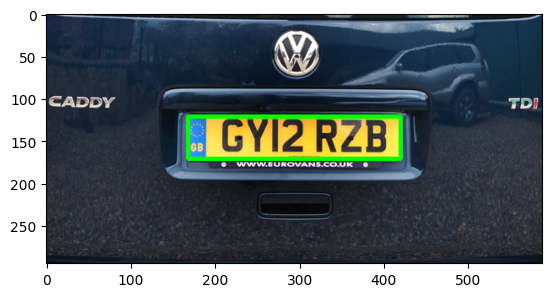

In [38]:

res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
     